---
# **Regression Using Different Machine Learning Models**
---



---
#### **The Data Set is taken from the UCI Machine Learning Repository Regression using different method are performed and the model performance is checked**
---






---
### **Importing the Libraries**
---





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

---
### **Data Set Information:**
---
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

---
### **Attribute Information:**
---
Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

---
 ### **Importing the DataSet**
---

In [2]:
df=pd.read_csv("/content/drive/MyDrive/DATA_SCIENCE_HOBBY_PROJECT/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90




---
### **Making copy of original DataSet**
---





In [3]:
df1=df.copy()



---
### **Exploratory Data Analysis of the DataSet**
---





In [4]:
print("\nInformation about the variables of DataFrame\n\n")
df1.info()


Information about the variables of DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
print("\nDescriptive Statistical Summary of DataFrame\n\n")
df1.describe().transpose()


Descriptive Statistical Summary of DataFrame




,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [6]:
print("\nNull Value Information in DataFrame\n")
df1.isnull().sum()/len(df1)*100


Null Value Information in DataFrame



AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64


Correlation Matrix of DataFrame



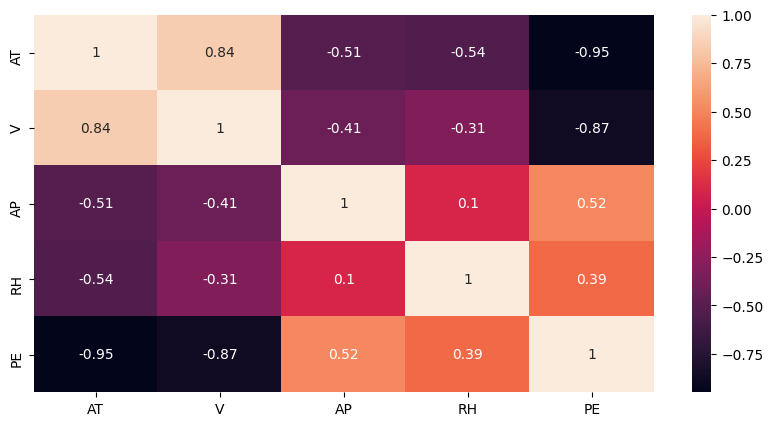

In [7]:
print("\nCorrelation Matrix of DataFrame\n")
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df1.corr(),annot=True)
plt.show()



---
### Distribution of the Independent Variable
---





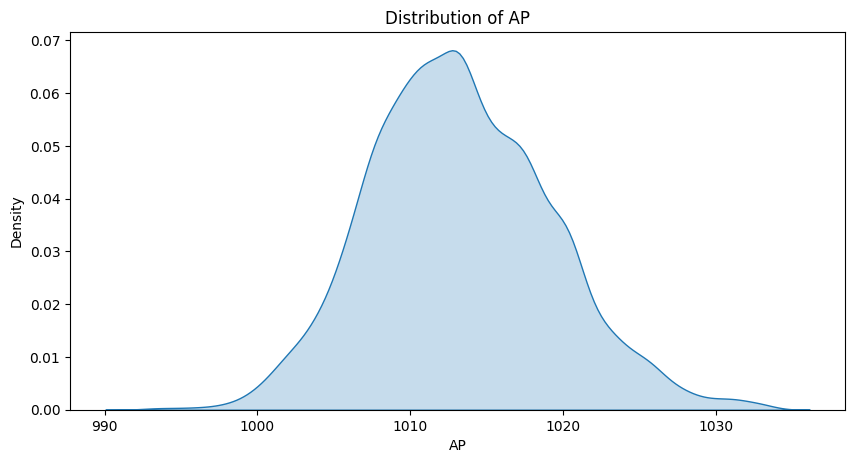

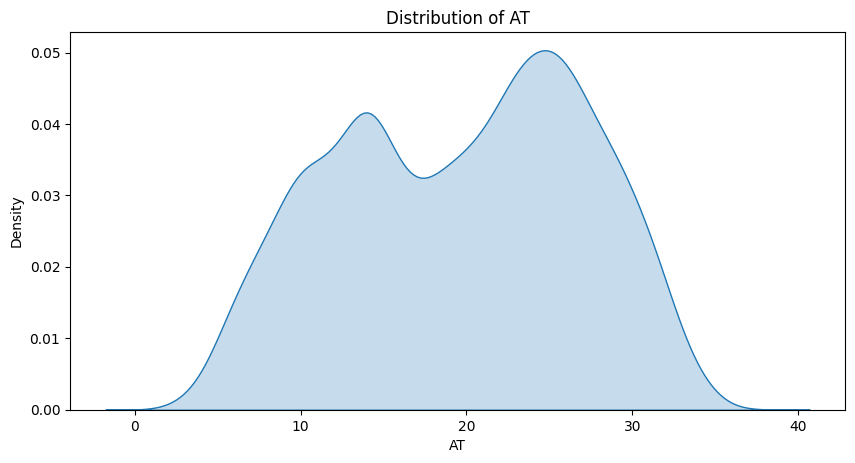

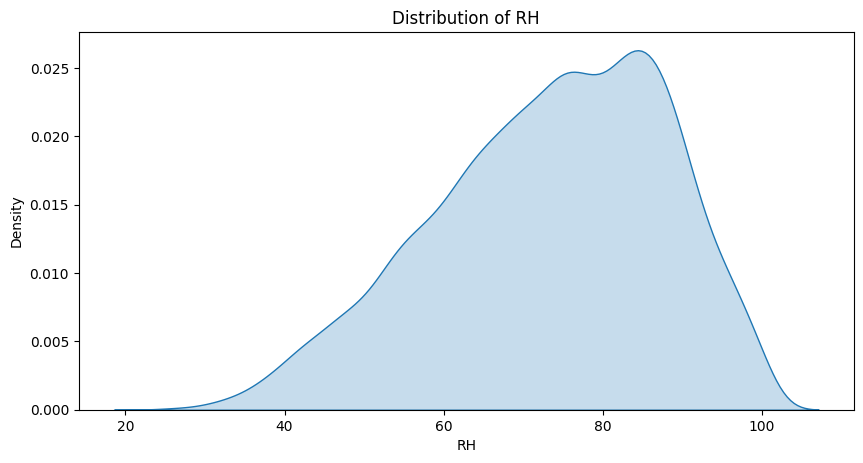

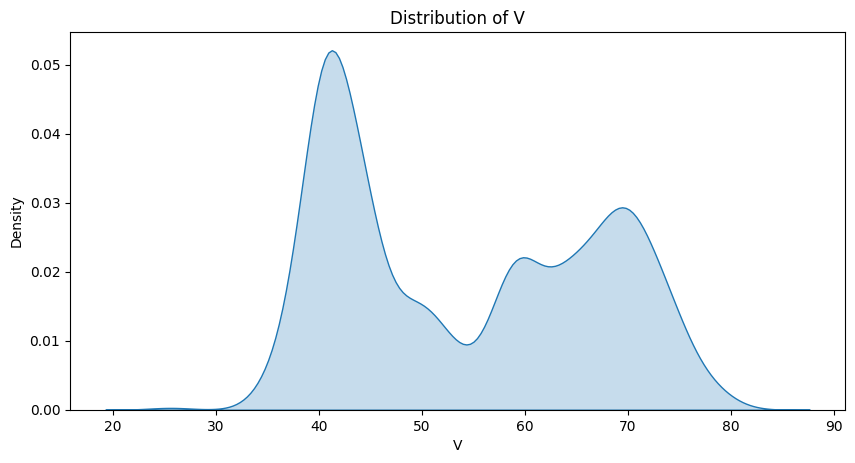

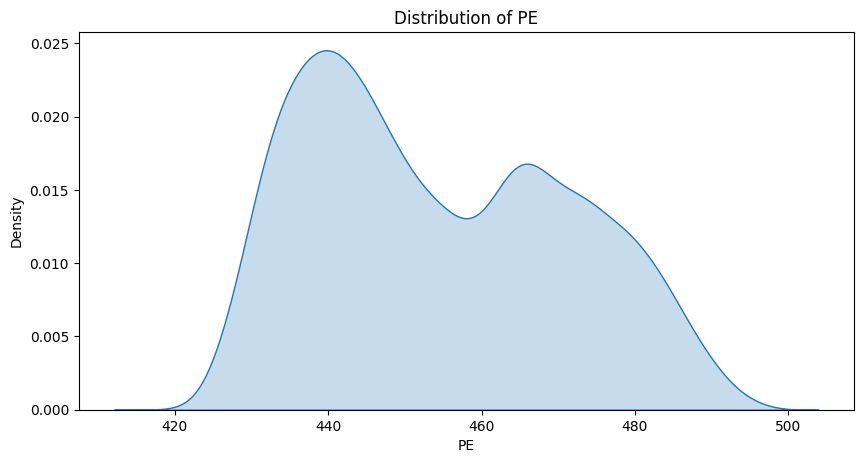

In [8]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df1['AP'],shade=True)
plt.title("Distribution of AP")
plt.show()
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df1['AT'],shade=True)
plt.title("Distribution of AT")
plt.show()
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df1['RH'],shade=True)
plt.title("Distribution of RH")
plt.show()
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df1['V'],shade=True)
plt.title("Distribution of V")
plt.show()
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df1['PE'],shade=True)
plt.title("Distribution of PE")
plt.show()



---
#### **Method 1: Model Formation and Prediction using OLS Method**
---





---
##### **Model Creation**
---

In [9]:
# Creating the dependent and Independent Variable
X=df1.iloc[:,:-1]
y=df1['PE']
Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:55:31   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

---
##### **Checking the Assumption**
---

In [10]:
# Linearity of Independent Variable with Dependent Variable
print(f"\nWe can infer that independent variables are linearly related to dependent variable by analysing coeff of correlation R={math.sqrt(model.rsquared)}")


We can infer that independent variables are linearly related to dependent variable by analysing coeff of correlation R=0.9636887930303297


In [11]:
# Multicollinearity between Independent and Dependent Variable
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

  feature        VIF
0      AT  39.157705
1       V  74.969127
2      AP  66.618618
3      RH  40.704756


In [12]:
print(f"\n\nThe Correlation between only independent variable\n\n{X.corr()}\n\n The Correlation between both independent variable and dependent variable\n\n{df1.corr()}\n\n We can conclude that if we remove variable Exhaust Vacuum(V) which is highly correlated with AT but not with PE in comparision to AT")



The Correlation between only independent variable

          AT         V        AP        RH
AT  1.000000  0.844107 -0.507549 -0.542535
V   0.844107  1.000000 -0.413502 -0.312187
AP -0.507549 -0.413502  1.000000  0.099574
RH -0.542535 -0.312187  0.099574  1.000000

 The Correlation between both independent variable and dependent variable

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000

 We can conclude that if we remove variable Exhaust Vacuum(V) which is highly correlated with AT but not with PE in comparision to AT


Method 1: Using Normal Distribution Plot


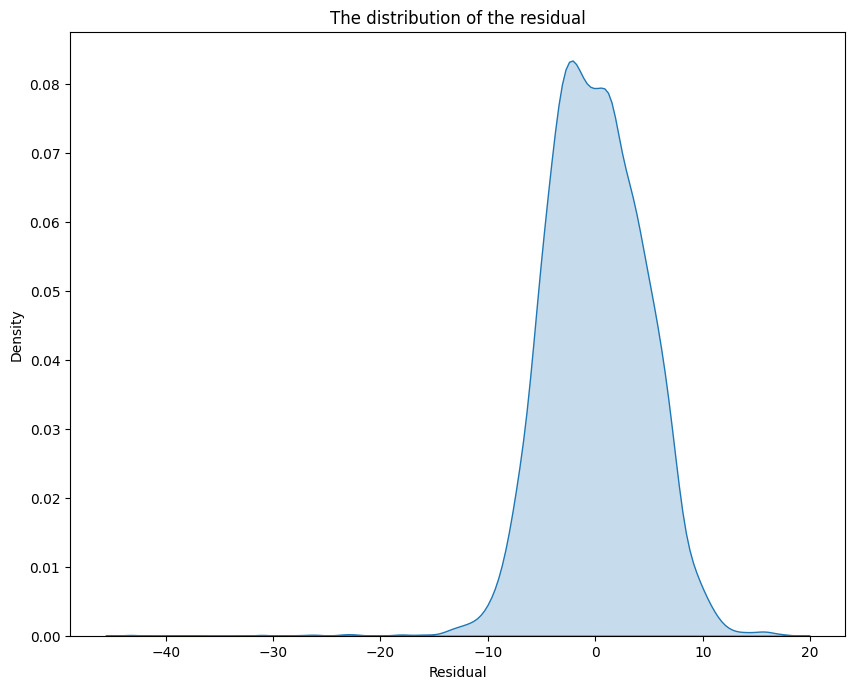

Method 2: Using QQ Plot


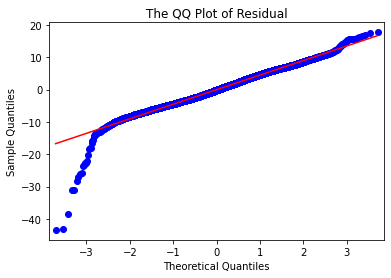

Method 3: Using Shapiro Test
The Shapiro test result of P_Value=2.727672939109137e-35 and it is <5% and hence the residual are normally distributed


In [13]:
# Normality of the Residual
print("Method 1: Using Normal Distribution Plot")
residual=model.resid
residual=pd.Series(data=residual,name="Residual")
plt.figure(figsize=(10,8),dpi=100)
sns.kdeplot(residual,shade=True)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("The distribution of the residual")
plt.show()
print("Method 2: Using QQ Plot")
sm.qqplot(residual, line ='r')
plt.title("The QQ Plot of Residual")
plt.show()
print("Method 3: Using Shapiro Test")
print(f"The Shapiro test result of P_Value={shapiro(residual)[1]} and it is <5% and hence the residual are normally distributed")

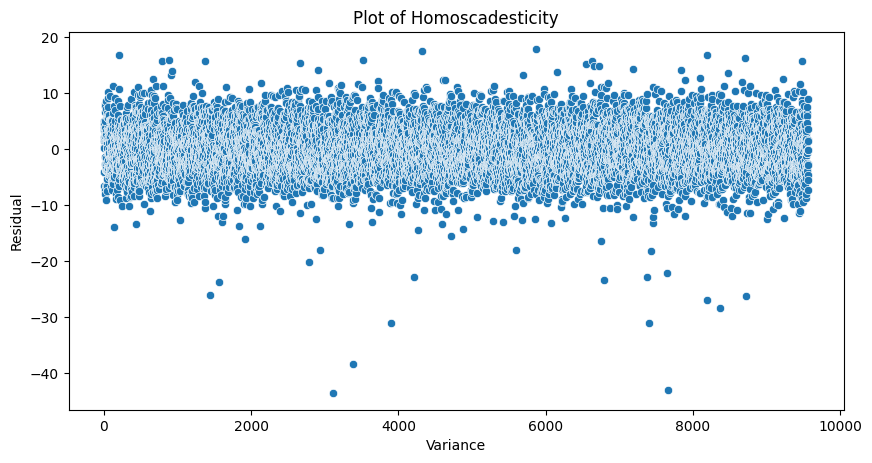

In [14]:
# Checking for Homoscedasticity
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=residual)
plt.ylabel("Residual")
plt.xlabel("Variance")
plt.title("Plot of Homoscadesticity")
plt.show()

In [15]:
# The Durbin watson test in the summary tells us there is no auto-correlation



---
##### **Model Performance**
---





In [16]:
y_hat=model.predict(Xc)
MAE=mean_absolute_error(y,y_hat)
MSE=mean_squared_error(y,y_hat)
RMSE=math.sqrt(MSE)
MAPE=np.mean(abs((y-y_hat)/y_hat*100))
print(f"The Performance metrics are as follows\nMAE={MAE:0.2f}\nMSE={MSE:0.2f}\nRMSE={RMSE:0.2f}\nMAPE={MAPE:0.2f}%")

The Performance metrics are as follows
MAE=3.63
MSE=20.77
RMSE=4.56
MAPE=0.80%


---
##### **Model Creation by removing the independent variable V from dataframe and checking the model performance**
---

In [17]:
# Creating the dependent and Independent Variable
X=df1.iloc[:,[0,2,3]]
y=df1['PE']
Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 3.717e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:55:32   Log-Likelihood:                -28578.
No. Observations:                9568   AIC:                         5.716e+04
Df Residuals:                    9564   BIC:                         5.719e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        490.3237     10.193     48.102      0.0

In [18]:
# Linearity of Independent Variable with Dependent Variable
print(f"\nWe can infer that independent variables are linearly related to dependent variable by analysing coeff of correlation R={math.sqrt(model.rsquared)}")


We can infer that independent variables are linearly related to dependent variable by analysing coeff of correlation R=0.959688767657358


In [19]:
# Multicollinearity between Independent and Dependent Variable
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

  feature        VIF
0      AT  10.821373
1      AP  64.595152
2      RH  36.414049


In [20]:
print(f"\n\nThe Correlation between only independent variable\n\n{X.corr()}\n\n The Correlation between both independent variable and dependent variable\n\n{df1[['AT','AP','RH','PE']].corr()}")



The Correlation between only independent variable

          AT        AP        RH
AT  1.000000 -0.507549 -0.542535
AP -0.507549  1.000000  0.099574
RH -0.542535  0.099574  1.000000

 The Correlation between both independent variable and dependent variable

          AT        AP        RH        PE
AT  1.000000 -0.507549 -0.542535 -0.948128
AP -0.507549  1.000000  0.099574  0.518429
RH -0.542535  0.099574  1.000000  0.389794
PE -0.948128  0.518429  0.389794  1.000000


Method 1: Using Normal Distribution Plot


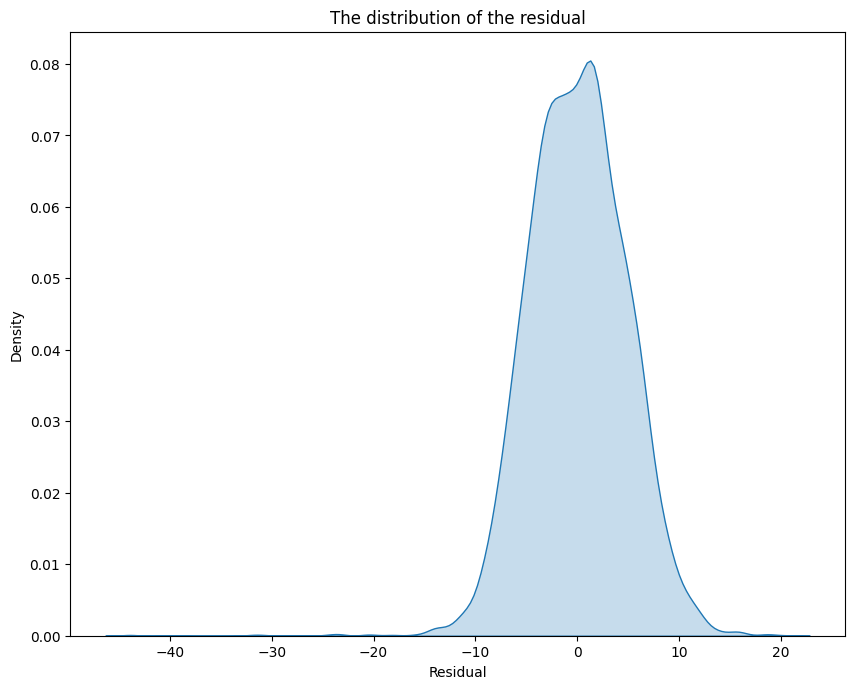

Method 2: Using QQ Plot


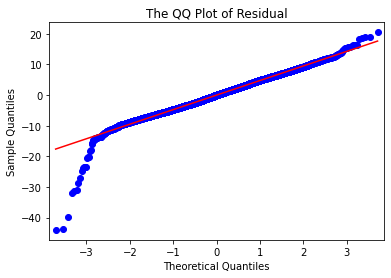

Method 3: Using Shapiro Test
The Shapiro test result of P_Value=8.82136437794742e-33 and it is <5% and hence the residual are normally distributed


In [21]:
# Normality of the Residual
print("Method 1: Using Normal Distribution Plot")
residual=model.resid
residual=pd.Series(data=residual,name="Residual")
plt.figure(figsize=(10,8),dpi=100)
sns.kdeplot(residual,shade=True)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("The distribution of the residual")
plt.show()
print("Method 2: Using QQ Plot")
sm.qqplot(residual, line ='r')
plt.title("The QQ Plot of Residual")
plt.show()
print("Method 3: Using Shapiro Test")
print(f"The Shapiro test result of P_Value={shapiro(residual)[1]} and it is <5% and hence the residual are normally distributed")

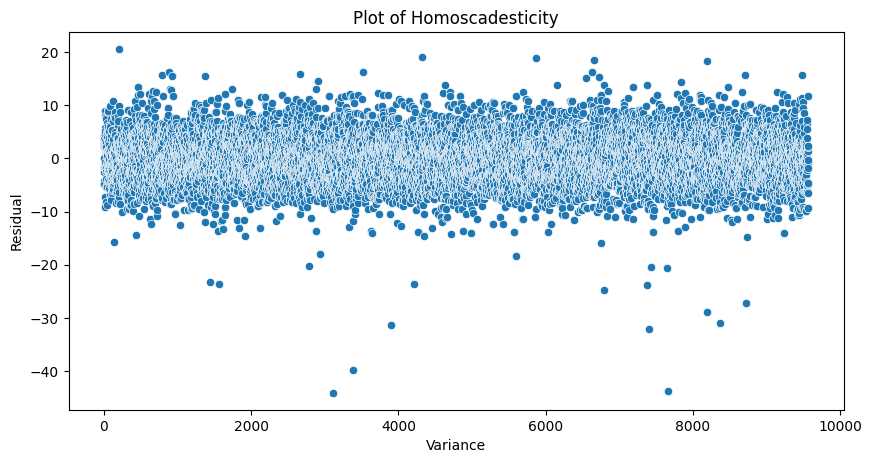

In [22]:
# Checking for Homoscedasticity
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=residual)
plt.ylabel("Residual")
plt.xlabel("Variance")
plt.title("Plot of Homoscadesticity")
plt.show()

In [23]:
# The Durbin watson test in the summary tells us there is no auto-correlation

In [24]:
y_hat=model.predict(Xc)
MAE=mean_absolute_error(y,y_hat)
MSE=mean_squared_error(y,y_hat)
RMSE=math.sqrt(MSE)
MAPE=np.mean(abs((y-y_hat)/y*100))
print(f"The Performance metrics are as follows\nMAE={MAE:0.2f}\nMSE={MSE:0.2f}\nRMSE={RMSE:0.2f}\nMAPE={MAPE:0.2f}%")

The Performance metrics are as follows
MAE=3.80
MSE=23.01
RMSE=4.80
MAPE=0.84%




---
#### **To check whether there is underfitting or overfitting of data**
---





**As we do not have data, we are creating the data and checking that predicting is best fit or there is bias or variance**

In [25]:
AT_new=np.linspace(1.81,37.11,9568)
AP_new=np.linspace(992.89,1033.3,9568)
RH_new=np.linspace(25.56,100.16,9568)

In [26]:
df_new=pd.DataFrame(data=AT_new,columns=["AT"])
df_new2=pd.DataFrame(data=AP_new,columns=["AP"])
df_new3=pd.DataFrame(data=RH_new,columns=["RH"])
df2=pd.concat([df_new,df_new2,df_new3],axis=1)

In [27]:
df2.head()

,AT,AP,RH
0,1.810000,992.890000,25.560000
1,1.813690,992.894224,25.567798
2,1.817380,992.898448,25.575595
3,1.821069,992.902672,25.583393
4,1.824759,992.906896,25.591191


In [28]:
Xn=sm.add_constant(df2)

In [29]:
y_test=model.predict(Xn)

In [30]:
MAE=mean_absolute_error(y,y_test)
MSE=mean_squared_error(y,y_test)
RMSE=math.sqrt(MSE)
MAPE=np.mean(abs((y-y_test)/y*100))
print(f"The Performance metrics are as follows\nMAE={MAE:0.2f}\nMSE={MSE:0.2f}\nRMSE={RMSE:0.2f}\nMAPE={MAPE:0.2f}%")

The Performance metrics are as follows
MAE=27.52
MSE=1091.93
RMSE=33.04
MAPE=6.06%


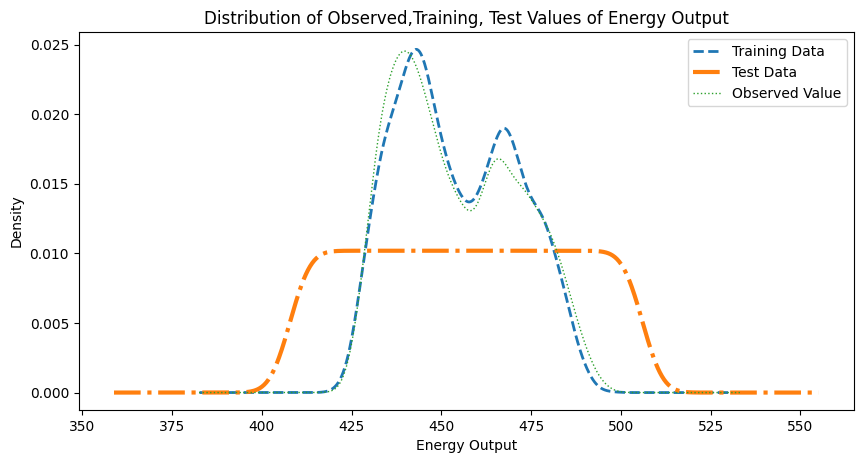

The model is a very overfit to observed values. As we can see Model performance parameters are varying a lot may be due to high variance in the random data


In [31]:
plt.figure(figsize=(10,5),dpi=100)
y_hat.sort_values().plot(kind='kde',label="Training Data",ls="--",lw=2)
y_test.sort_values().plot(kind='kde',label="Test Data",ls="-.",lw=3)
y.sort_values().plot(kind='kde',label="Observed Value",ls=":",lw=1)
plt.ylabel("Density")
plt.xlabel("Energy Output")
plt.title("Distribution of Observed,Training, Test Values of Energy Output")
plt.legend()
plt.show()
print("The model is a very overfit to observed values. As we can see Model performance parameters are varying a lot may be due to high variance in the random data")